## Drive Link

https://drive.google.com/drive/folders/1UzZL2YTeXVU0gkfdkeWvrB7dV8PfEDcT?usp=sharing

In [172]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [173]:
# image folder path
folder = './../images'

# loads the image and converts it to rgb
def image(name):
    img = cv2.imread(folder + '/' + name)
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# loads the image in grayscale format
def grayImage(name):
    img = cv2.imread(folder + '/' + name, cv2.IMREAD_GRAYSCALE)
    return img

## Task 1

Q advises you to cover your tracks by generating fake images. To teach you, 007, <br>
Q has shown you an example of image matting(chroma-keying) where you will take an image of yourself on a green screen and add a fake background to it. How does the green screen help in this task?

In [174]:
# loading fg, bg image
fg = image('fg.jpg')
bg = image('bg.jpg')

print(fg.shape)
print(bg.shape)

(720, 1280, 3)
(720, 1280, 3)


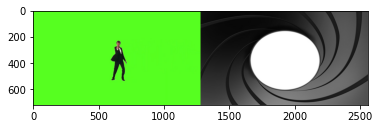

In [175]:
# plotting fg, bg images
plt.figure(figsize=(6,6))
plt.imshow(np.hstack([fg, bg]), vmin=0, vmax=255)
plt.show()

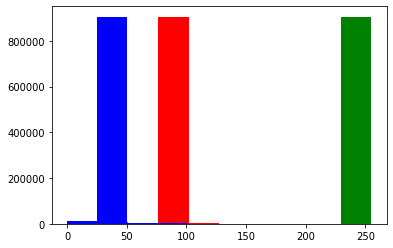

In [176]:
# histogram of different channels of fg image
plt.hist(fg[:, :, 0].ravel(), color='red')
plt.hist(fg[:, :, 1].ravel(), color='green')
plt.hist(fg[:, :, 2].ravel(), color='blue')
plt.show()

In [177]:
# threshold for green background
thresh = np.array([150, 150, 150])

# shifts the image to x down and y right
def shift_fg(fg, x, y):
    h, w, c = fg.shape
    if abs(x) >= h or abs(y) >= w:
        x, y = 0, 0
    img = np.ones((h, w, c), dtype='uint8')
    img[:, :, 1] = 255
    img[max(0,x):min(h,h+x), max(0,y):min(w,w+y)] = fg[max(0,-x):min(h-x, h), max(0,-y):min(w-y, w)]
    return img

# changes background of fg to bg
def change_bg(fg, bg):
    h, w, c = fg.shape
    bh, bw, _ = bg.shape
    img = fg.copy()
    img = img[:min(h,bh),:min(w,bw)]
    idx = (img[:, :, 1] >= thresh[1]) & (img[:, :, 0] <= thresh[0]) & (img[:, :, 2] <= thresh[2])
    img[idx] = bg[:min(h,bh),:min(w,bw)][idx]
    return img

# shifts fg and changes it's background to bg
def shift_change(fg, bg, x=0, y=0):
    img = shift_fg(fg, x, y)
    img = change_bg(img, bg)
    return img

### Task 1.1.1

Test your implementation using the provided foreground(fg.jpg) and background(bg.jpg).

<hr style="border:1px solid gray"> </hr>

1. Green background of fg image is replaced by bg image by replacing pixels of fg image which are not in the threshold with bg's pixels.

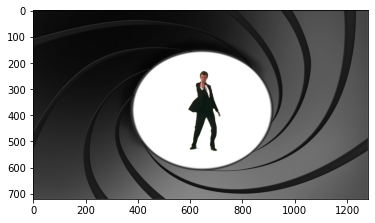

In [178]:
# green background of fg changes to bg
plt.imshow(change_bg(fg, bg), vmin=0, vmax=255)
plt.show()

### Task 1.1.2

Graft 007 (fg.jpg) onto Bond’s Skyfall mansion. Find this mansion’s image from the internet.

<hr style="border:1px solid gray"> </hr>

1. The position of fg image is shifted to 180 pixels down and 100 pixels right.
2. Green background of fg image is replaced by mansion image by replacing pixels of fg image which are not in the threshold with mansion's pixels.

In [179]:
# loading mansion image
mansion = image('Skyfall_Lodge.jpg')
print(mansion.shape)

(800, 1563, 3)


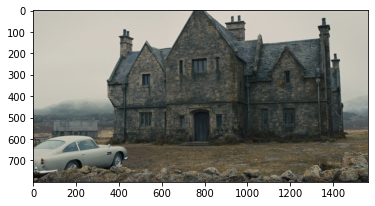

In [180]:
# plotting mansion image
plt.imshow(mansion, vmin=0, vmax=255)
plt.show()

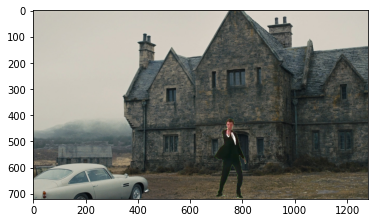

In [181]:
# fg shifted to 180 pixels donw and 100 right and it's green background changed to mansion
plt.imshow(shift_change(fg, mansion, 180, 100), vmin=0, vmax=255)
plt.show()

### Task 1.1.3

Be creative and do the same procedure with a background image of your choice with you in it! You can take any foreground green-screen image from the internet

<hr style="border:1px solid gray"> </hr>

1. The position of fg image is shifted to 180 pixels down and 100 pixels right.
2. Green background of fg image is replaced by another image by replacing them with pixels of fg image which are not in the threshold.

In [182]:
# loading image
me = image('me.jpg')
print(me.shape)

(1280, 960, 3)


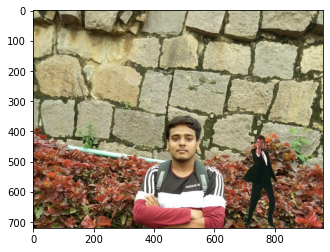

In [183]:
# fg shifted to 180 pixels donw and 100 right and it's green background changed to mansion
plt.imshow(shift_change(fg, me, 180, 100), vmin=0, vmax=255)
plt.show()

### Task 1.2

As you are a focused agent, you are also worried about how many images you can store on the MI6 cloud with a size of 4 GB. If your fake trail colour images happen to have a size of 1280 x 720, and are stored for displaying on standard displays,calculate the number of images you can store in the cloud.

<hr style="border:1px solid gray"> </hr>

**Steps:**

1. Total size of the cloud is 4Gb (total_size) = $4 * 2^{10} * 2^{10} * 2^{10}$ bytes
2. Size of one colour image (image_size) = $1280 * 720 * 3$
3. Therefore, maximum images that can be stored on the cloud (max_images) = $floor(\frac{total\_size}{image\_size})$

In [184]:
# converting total cloud size of 4GB to Bytes
total_size = 4 * (2**10) * (2**10) * (2**10)
# colour image (RGB) size: 1280 x 720 x 3 
image_size = 1280 * 720 * 3      

# maximum images that can be stored is total cloud size divided by size of single image
max_images = total_size // image_size

print('Maximum images that can be stored in the cloud is:', max_images)

Maximum images that can be stored in the cloud is: 1553


## Task 2

Calculate the dimensions of a square colour image that is used for MI6 command center displays. The image occupies a size of 168.75 MB.

<hr style="border:1px solid gray"> </hr>

**Steps:**

1. size of the square colour image is 168.75 MB (image_size) = $168.75 * 2^{10} * 2^{10}$ bytes.
2. image_size = $d * d * 3$, where d is the length of the square image.
2. Therefore d = $\sqrt{\frac{image\_size}{3}}$

In [185]:
import math

# converting image size of 168.75 MB to Bytes
image_size = 168.75 * (2**10) * (2**10)
# size of square colour image = d * d * 3 where d is the length of the image
# therefore image_dim = d = square root of (image_size / 3)
image_dim = int(math.sqrt(image_size / 3))
print("Image shape is:", str(image_dim)+'x'+str(image_dim)+'x'+str(3))

Image shape is: 7680x7680x3


## Task 3

The height of the insignia is t = 32.8cm, and your camera has a square CCD sensor of dimensions 10 x 10 mm with 1024 x 1024 pixels. Focal length the camera lens is adjusted to 62.5cm. You need to ensure that the insignia covers atleast 50 pixels in height, in your captured image, to be readable. What is the farthest distance d you can be from the insignia? Report d to the nearest integer.

<hr style="border:1px solid gray"> </hr>

**Steps:**

1. Minimum length of image formed at focal point (h) in cm = $50*1 cm$ as image should be of minimum 50 pixels and length of sensor is 10mm = 1cm.
2. focal length of lens (f) = 62.5 cm and height of target (t) = 32.8 cm.
3. Let d be the maximum distance of target from the lens in cm and principal axis passing through centre of lens and target.
4. Using similar triangle property, $\frac{d}{t} = \frac{f}{h}$.
5. Therefore, maximum distance (d) in cm = $round(f * \frac{t}{h})$.

In [186]:
# minimum length of image formed at focal point in cm is: pixels * (dim of cell in cm) = 50 * 10 mm = 50 * 10 / 10 cm
h = 50 * (10 / 10)
# focal length in cm
f = 62.5   
# height of target (t) in cm 
t = 32.8
# d is the maximum distance of target from camera in cm
# using similar triangle property, d / t = f / h
d = round(f * t / h)
print('Maximum distance of the target from the camera can be:', d, 'cm')

Maximum distance of the target from the camera can be: 41 cm


### Task 4.1

Write a function bitQuantizeImage which takes an 8-bit image im and k, the number of bits to which the image needs to be quantized to and returns the k-bit quantized image.

<hr style="border:1px solid gray"> </hr>

**Bit Quantization**
1. bitQuantizeImage takes two parameters im, k and quantize 8 bit image im to k bits.
2. image is first normalized by dividing pixels by $2^{8}-1$ = 255.
3. pixels are then multiplied by $2^{k}-1$ and rounded to nearest integer.

In [187]:
# quantize 8 bit image im to k bits
def bitQuantizeImage(im, k):
    im = np.array(im)
    # image is normalized and then multiplied by (2**k - 1) to map 255 to 2**k - 1
    # image is rounded to nearest integer
    im = np.round(im / 255 * ((2**k) - 1)).astype('uint8')
    return im

## Task 4.2

M wants an experienced hand to take this assignment, so prove yourself by running the above function on 007 test1.jpg and find all possible quantization results (k=1 to k=8).

In [188]:
# loading 007_test1 image
test1 = image('007_test1.png')
print(test1.shape)

(792, 1887, 3)


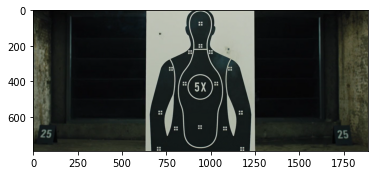

In [189]:
# plotting 007_test1 image
plt.imshow(test1, vmin=0, vmax=255)
plt.show()

In [190]:
# quantizing test1 image to k bits for k 1 to 8
qimg = np.array([], dtype='uint8').reshape(0, 2 * test1.shape[1], test1.shape[2])
for k in range(1, 9, 2):
    qimg = np.vstack([qimg, np.hstack([bitQuantizeImage(test1, k), bitQuantizeImage(test1, k + 1)])])

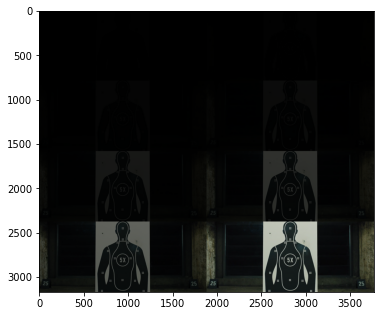

In [191]:
# plotting quantized image for k 1 to 8
plt.figure(figsize = (6,6))
plt.imshow(qimg, vmin=0, vmax=255)
plt.show()

## Task 4.3

M is still not satisfied enough, so she commands you to show all the bit planes of 007 test2.jpg. Pass the test.

In [192]:
# loading 007_test2 image
test2 = grayImage('007_test2.png')
print(test2.shape)

(776, 718)


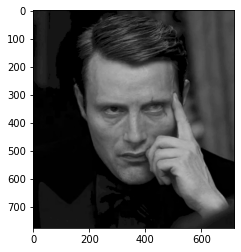

In [193]:
# plotting 007_test2 image
plt.imshow(test2, cmap='gray', vmin=0, vmax=255)
plt.show()

<hr style="border:1px solid gray"> </hr>

**Bit Planes**

1. bitPlaneImage takes two parameters im, k and returns the bit plane of image im corresponding to kth bit.
2. im & (1<<k) != 0 is true if kth bit of im != 0 otherwise false. This bit plane of 1 and 0 is multiplied by 255 to plot the bit plane.

In [194]:
# returns bit plane of gray scale image corresponding to kth bit
def bitPlaneImage(im, k):
    plane = 255 * ((im & (1<<k)) != 0)
    return plane

In [195]:
# bit planes of test2 image for k 0 to 7
pimg = np.array([], dtype='uint8').reshape(test2.shape[0], 0)
for k in range(8):
    pimg = np.hstack([pimg, bitPlaneImage(test2, k)])

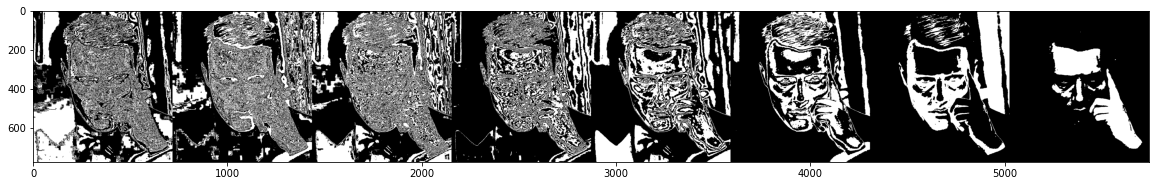

In [196]:
# plotting 8 bit planes of 007_test2 image
plt.figure(figsize=(20,20))
plt.imshow(pimg, cmap='gray', vmin=0, vmax=255)
plt.show()

## Task 4.4

Help 007 guess the corruption procedure for a target person’s image, person_corrupt.jpg, using the above functions. The correct images that you know for that corresponding person from the database is represented by person.jpg.

<hr style="border:1px solid gray"> </hr>

2018101075 % 5 = 0, so person = q

In [197]:
# loading q, q_corrupt image
q = grayImage('q.jpg')
q_corrupt = grayImage('q_corrupt.jpg')

print(q.shape)
print(q_corrupt.shape)

(466, 890)
(466, 890)


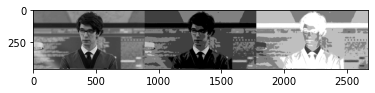

In [198]:
# plotting q, 255 - q_corrupt, q_corrupt images
plt.imshow(np.hstack([q, 255 - q_corrupt, q_corrupt]), cmap='gray', vmin=0, vmax=255)
plt.show()

<hr style="border:1px solid gray"> </hr>

**Corruption Procedure**
1. As is clear from the image that corruption procedure includes taking negative of the image.
2. We plot histogram of q(green) and negative of q_corrupted(red) image to see which pixels and bit planes are missing.
3. We remove different bit planes from the q based on histogram and check against q_corrupted image.
4. Histogram of new image (in blue colour) and negative of q_corrupted image (in red colour) is plotted below, then whichever combination covers the red histogram the most is our corruption procedure.
5. Finally, corruption procedure includes taking 7th, 6th, 3rd bit plane of the original image and taking negative of the image to get q_corrupted image.

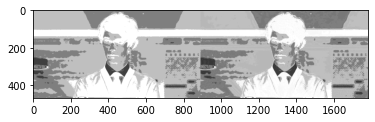

In [199]:
# corruption procedure
# k = 255 - (1<<5) - (1<<4) - (1<<3)
k = 255 - (1<<5) - (1<<4) - (1<<2) - (1<<1) - (1<<0)
plt.imshow(np.hstack([q_corrupt, 255 - (q & k)]), cmap='gray', vmin=0, vmax=255)

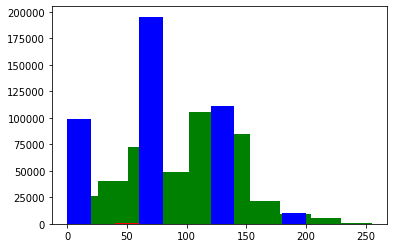

In [200]:
# histogram of intensity range of q, q_corrupt images
# un
plt.hist(q.ravel(), color='green')
# negative of corrupted image
plt.hist(255 - q_corrupt.ravel(), color='red')
# negative of constructed corrupted image
plt.hist((q & k).ravel(), color='blue')
plt.show()

In [201]:
# quantizing q image to k bits for k 1 to 8
qimg = np.array([], dtype='uint8').reshape(q.shape[0], 0)
for k in range(1, 9):
    qimg = np.hstack([qimg, bitQuantizeImage(q, k)])

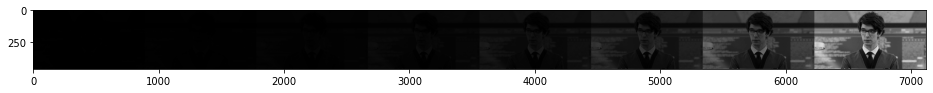

In [202]:
# plotting quantized q image for k 1 to 8
plt.figure(figsize=(16,16))
plt.imshow(qimg, cmap='gray', vmin=0, vmax=255)
plt.show()

In [203]:
# bit planes of q image for k 0 to 7
pimg = np.array([], dtype='uint8').reshape(q.shape[0], 0)
for k in range(8):
    pimg = np.hstack([pimg, bitPlaneImage(q, k)])

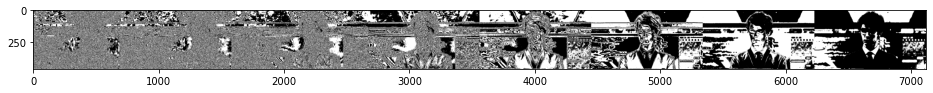

In [204]:
# plotting bit planes of q image for k 0 to 7
plt.figure(figsize=(16,16))
plt.imshow(pimg, cmap='gray', vmin=0, vmax=255)
plt.show()

## Task 5

1. Write a function linContrastStretching which takes any image im, integers a and b that enhances the contrast such that the resulting intensity range is [a, b] .

2. Use this function to improve the intensity of the quantum bad.jpg and assist 007.

<hr style="border:1px solid gray"> </hr>

**Contrast Stretching**
1. quantum_bad image has contrast = max - min = 82 - 0 = 82, which is low.
2. we stretch and map the intensity values for 0-82 to 0-255, where 0 is mapped to 0 and 82 is mapped to 255.
3. formula for stretching = $a + (img - low) * \frac{b - a}{high - low}$, where [low, high] is the old range and [a, b] is the new range of the image.
4. first we normalize image by subtracting low from image and dividing it by (high - low).
5. then, we map it to [a,b] by multiplying it by (b - a) and adding a to the image.

In [205]:
# modifies the intensity range to [a, b]
def linContrastStretching(im, a, b):
    cimg = np.array(im).astype('float')
    low, high = np.min(cimg), np.max(cimg)
    cimg = a + (cimg - low) * (b - a) / (high - low)
    cimg = np.round(cimg).astype('uint8')
    return cimg

In [206]:
# loading quantum_bad image
quantum_bad = image('quantum_bad.jpg')
print(quantum_bad.shape)

(921, 1777, 3)


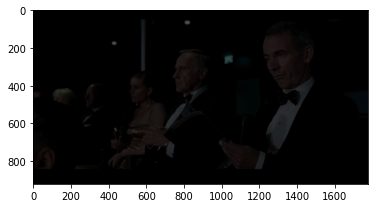

In [207]:
# plotting the image
plt.imshow(quantum_bad, vmin=0, vmax=255)
plt.show()

min:  0
max:  82


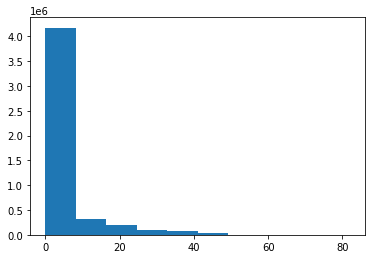

In [208]:
print('min: ', np.min(quantum_bad))
print('max: ', np.max(quantum_bad))
plt.hist(quantum_bad.ravel())
plt.show()

In [209]:
contrastImg = linContrastStretching(quantum_bad, 0, 255)

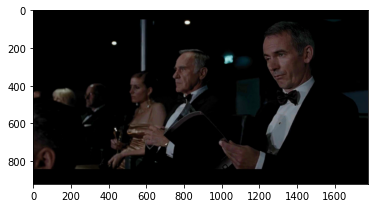

In [210]:
# plotting enhanced image
plt.imshow(contrastImg, vmin=0, vmax=255)
plt.show()

min:  0
max:  255


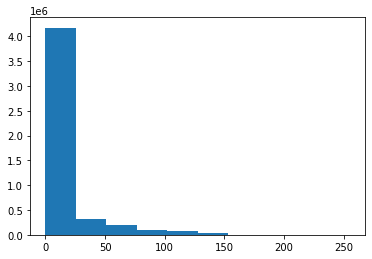

In [211]:
print('min: ', np.min(contrastImg))
print('max: ', np.max(contrastImg))
plt.hist(contrastImg.ravel())
plt.show()

## Task 6

1. Write a function histEqualization which takes a grayscale image im, and applies histogram equalization on the entire image.
2. Write a function histMatching which takes an input image and a reference image and applies histogram Matching on the input image by matching the histogram with that of the reference image.
3. Decipher the map using the satellite image by applying histMatching. Somewhere in the map there will be an indicative piece of string denoting the name of a person who died.

<hr style="border:1px solid gray"> </hr>

**Histogram Equalization**

1. T: r -> s, where r, s are the intensity values.
2. s = T(r) = $round(\ (L - 1) \sum_{w=0}^{w=r} P(w)\ )$, <br>
where P(r) is the probability of rth intensity value = $\frac{frequency\ of\ r^{th} intensity}{total\ pixels}$ and L = $2^{8}$ = 256 for 8 bit image.
3. cv2.calcHist is used to calculate frequency of each intensity value and divided by total pixels to get probability distribution.
4. np.cumsum is used to get $\sum_{w=0}^{w=r} P(w)$ for each r and multiplied by L - 1 = 255 to get histogram equalized image.

In [212]:
# histogram equalization
def histEqualization(im):
    # calculating frequency of each intensity
    hist = cv2.calcHist([im],[0],None,[256],[0,256]).ravel().astype('float')
    # dividing by total pixels to get the probability for each intensity
    hist /= np.sum(hist)
    # new intensity value is calculated by multiplying 255 to cumulative probability
    eq = np.round(np.cumsum(hist) * 255).astype('uint8')
    return eq[im]

In [213]:
pr1 = grayImage('practice_range1.jpg')
hist = grayImage('hist.jpg')
print(pr1.shape)
print(hist.shape)

(667, 1000)
(370, 524)


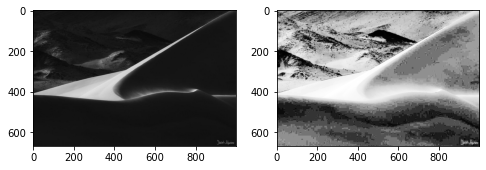

In [214]:
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(pr1, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(histEqualization(pr1), cmap='gray', vmin=0, vmax=255)
plt.show()

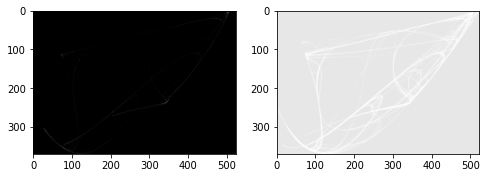

In [215]:
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(hist, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(histEqualization(hist), cmap='gray', vmin=0, vmax=255)
plt.show()

<hr style="border:1px solid gray"> </hr>

**Histogram Matching**

1. Let T be the histogram equalization function for im and G be the histogram equalization function for ref (histogram equalization explained in above part).
2. histogram matching s = $G^{-1}(T(r))$.
3. s_cum is the output of T and t_cum is the output of G.
4. Now, we find s for each r such that G(s) $\approx$ T(r).
5. For each r, we find s such that s = argmin( abs( t_cum - s_cum \[ r \] ) ).

In [216]:
# histogram matching
def histMatching(im, ref):
    s_val, bin_idx, s_cnt = np.unique(im.ravel(), return_inverse=True, return_counts=True)
    t_val, t_cnt = np.unique(ref.ravel(), return_counts=True)
    
    s_cum = np.cumsum(s_cnt).astype('float') / np.sum(s_cnt)
    t_cum = np.cumsum(t_cnt).astype('float') / np.sum(t_cnt)
    
    values = t_val[np.argmin(np.abs(t_cum.reshape(1, t_cum.shape[0]) - s_cum.reshape(s_cum.shape[0], 1)), axis=1)]
    
#     values = np.round(np.interp(s_cum, t_cum, t_val)).astype('uint8')
    
    return values[bin_idx].reshape(im.shape)

In [217]:
map = grayImage('Map.jpg')
sat = grayImage('satellite_img.jpg')
print(map.shape)
print(sat.shape)

(2012, 3000)
(1067, 1555)


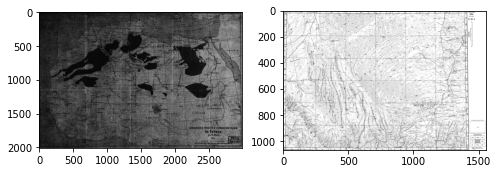

In [218]:
plt.figure(figsize=(8, 8))
plt.subplot(121)
plt.imshow(map, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(sat, cmap='gray', vmin=0, vmax=255)
plt.show()

In [219]:
histmap = histMatching(map, sat)
cv2.imwrite(folder + '/histmap.png', histmap)

True

<hr style="border:1px solid gray"> </hr>

**Map - Histogram Matching**

Name of the person in the map: *Vesper*

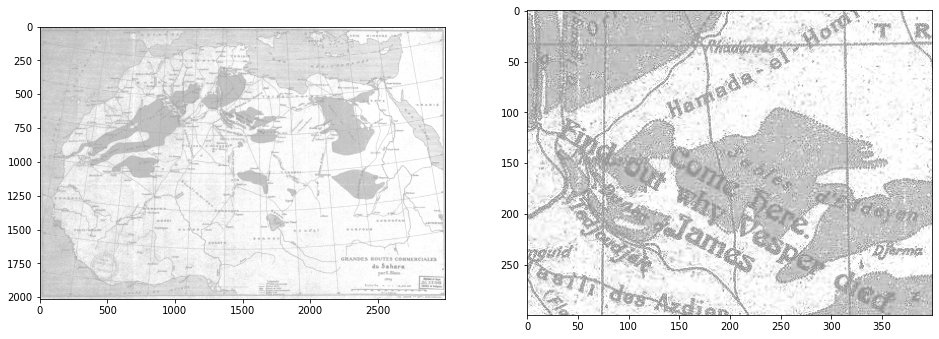

In [220]:
# plotting histogram matched images
plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.imshow(histmap, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(histmap[500:800, 1300:1700], cmap='gray', vmin=0, vmax=255)
plt.show()

## Task 7.1

Write a function piecewiseLinTransform to implement a piecewise linear trans- form g(z) = $K_{1}^{i} * z + K_{2}^{i}$; $a^{i} ≤ z ≤ b^{i}$ The function takes an input grayscale image, coefficients $K_{1} ,K_{2}$ and intervals [a, b] for each linear segment and produces the transformed output image.

In [221]:
# piecewise linear transform
def piecewiseLinTransform(im, coeff, interval):
    coeff[:, 1:] = coeff[:, 1:] * 255
    interval = np.round(interval * 255).astype('int')
    inp = np.array([i for i in range(256)])
    out = np.array([i for i in range(256)])
    # for each intensity, new intensity is calculated
    for i in range(len(coeff)):
        out[interval[i][0]:interval[i][1]+1] = coeff[i][0] * inp[interval[i][0]:interval[i][1]+1] + coeff[i][1]
    out = np.round(out).astype('uint8')
    return out[im]

## Task 7.2

Run the images through piecewiseLinTransform on bondvillain1.jpg and bondvillain2.jpg. The piecewise linear functions to be used are given for each image.

In [222]:
bond1 = grayImage('bondvillain1.jpg')
bond2 = grayImage('bondvillain2.jpg')
print(bond1.shape)
print(bond2.shape)

(1500, 1013)
(1500, 1013)


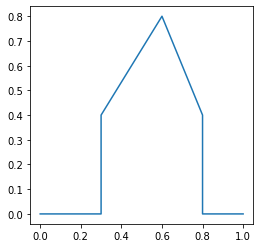

In [223]:
x = [0, 0.3, 0.3, 0.6, 0.8, 0.8, 1]
y = [0, 0, 0.4, 0.8, 0.4, 0, 0]
plt.figure(figsize=(4, 4))
plt.plot(x, y)
plt.show()

In [224]:
coeff1 = np.array([[0, 0], [4/3, 0], [-2, 2], [0, 0]])
interval1 = np.array([[0, 0.3], [0.3, 0.6], [0.6, 0.8], [0.8, 1.0]])
pb1 = piecewiseLinTransform(bond1, coeff1, interval1)

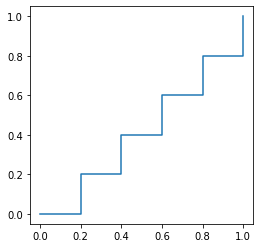

In [225]:
x = [0, 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0, 1.0]
y = [0, 0, 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1.0]
plt.figure(figsize=(4, 4))
plt.plot(x, y)
plt.show()

In [226]:
coeff2 = np.array([[0, 0], [0, 0.2], [0, 0.4], [0, 0.6], [0, 0.8], [0, 1.0]])
interval2 = np.array([[0, 0.2], [0.2, 0.4], [0.4, 0.6], [0.6, 0.8], [0.8, 1.0], [1.0, 1.0]])
pb2 = piecewiseLinTransform(bond2, coeff2, interval2)

<hr style="border:1px solid gray"> </hr>

**Piecewise linear transformation**

1. In the first image, white pixel is mapped to black pixel, so text becomes black after transformation.
2. In the second image, white pixel remains in the range of white, so text remains white after transformation.

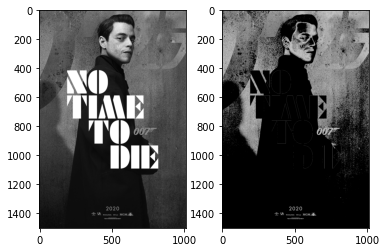

In [227]:
plt.subplot(121)
plt.imshow(bond1, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(pb1, cmap='gray', vmin=0, vmax=255)
plt.show()

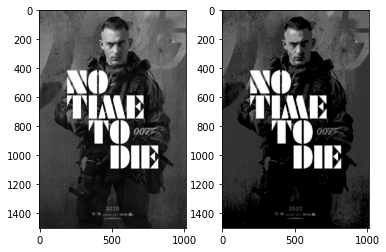

In [228]:
plt.subplot(121)
plt.imshow(bond2, cmap='gray', vmin=0, vmax=255)
plt.subplot(122)
plt.imshow(pb2, cmap='gray', vmin=0, vmax=255)
plt.show()

## Task 7.3

Take any image of any from the internet and run piecewiseLinTransform using any custom piecewise linear function that you like. Plot the function used.

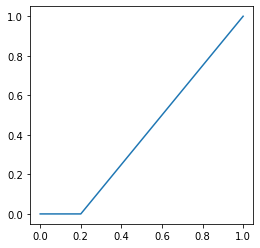

In [229]:
x = [0, 0.2, 1]
y = [0, 0, 1]
plt.figure(figsize=(4, 4))
plt.plot(x, y)
plt.show()

In [230]:
coeff = np.array([[0, 0], [10/8, 10/8]])
interval = np.array([[0, 0.2], [0.2, 1]])
pb = piecewiseLinTransform(bond2, coeff, interval)

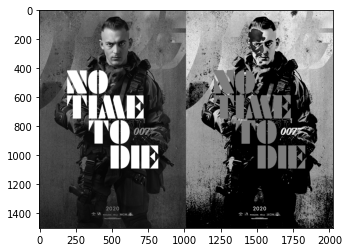

In [231]:
plt.imshow(np.hstack([bond2, pb]), cmap='gray', vmin=0, vmax=255)
plt.show()

## Task 8

1. Write a function gammaTransform that implements s = $r^{γ}$ on a grayscale image and vary γ.
2. Use this function on stealth.png and increase illumination in the image. Report value of gamma used.
3. Use this function on unstealth.png and hide yourself as you try to apprehend Carver. Make illumination lesser. Report value of gamma used.
4. Use this function on your Aston Martin DBS image, aston invisible.jpg to see the numberplate clearly

In [232]:
# gamma transformation
def gammaTransform(im, gamma):
    im  = ((im / 255) ** gamma) * 255
    im *= 255 / np.max(im)
    return np.round(im).astype('uint8')

In [233]:
st = grayImage('stealth.png')
un = grayImage('unstealth.png')
car = grayImage('aston_invisible.jpg')
print(st.shape)
print(un.shape)
print(car.shape)

(821, 1920)
(820, 1098)
(788, 1307)


<hr style="border:1px solid gray"> </hr>

**Gamma:**

Gamma value used for stealth.png image = 0.85

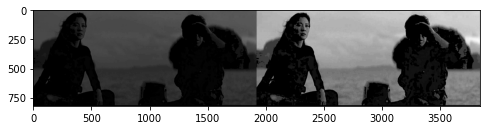

In [234]:
plt.figure(figsize=(8, 16))
plt.imshow(np.hstack([st, gammaTransform(st, 0.85)]), cmap='gray', vmin=0, vmax=255)
plt.show()

<hr style="border:1px solid gray"> </hr>

**Gamma:**

Gamma value used for unstealth.png image = 1.85

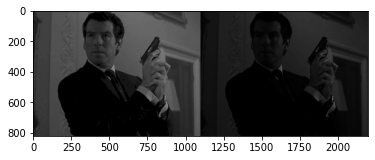

In [235]:
plt.imshow(np.hstack([un, gammaTransform(un, 1.85)]), cmap='gray', vmin=0, vmax=255)
plt.show()

<hr style="border:1px solid gray"> </hr>

**Gamma:**

Gamma value used for car image = 0.2

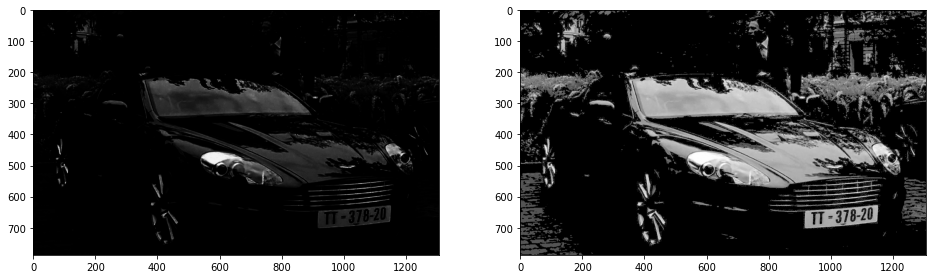

In [236]:
plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.imshow(car, cmap='gray')
plt.subplot(122)
plt.imshow(gammaTransform(car, 0.2), cmap='gray', vmin=0, vmax=255)
plt.show()

## Task 9

You will find 4 grayscale images (james1.jpg, james2.jpg, james3.jpg, james4.jpg) with different contrast levels, which correspond to parts of the same image. Retrieve the original image using these four images as best you can.

In [237]:
j1 = grayImage('james1.jpg')
j2 = grayImage('james2.jpg')
j3 = grayImage('james3.jpg')
j4 = grayImage('james4.jpg')
print(j1.shape)
print(j2.shape)
print(j3.shape)
print(j4.shape)

(400, 600)
(400, 600)
(400, 600)
(400, 600)


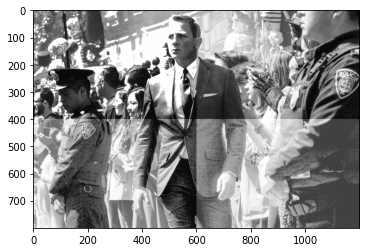

In [238]:
# plotting given images
J = np.vstack([np.hstack([j1, j2]), np.hstack([j3, j4])])
plt.imshow(J, cmap='gray', vmin=0, vmax=255)
plt.show()

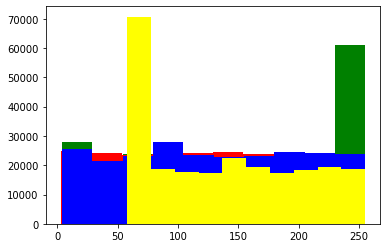

In [239]:
plt.hist(j1.ravel(), color='green')
plt.hist(j2.ravel(), color='red')
plt.hist(j3.ravel(), color='blue')
plt.hist(j4.ravel(), color='yellow')
plt.show()

<hr style="border:1px solid gray"> </hr>

**Final Image**


In [240]:
jd1 = linContrastStretching(gammaTransform(histEqualization(j1), 1.6), 0, 230)
jd2 = gammaTransform(j2, 2)
jd3 = gammaTransform(j3, 4)
jd4 = gammaTransform(linContrastStretching(j4, 0, 255), 4)

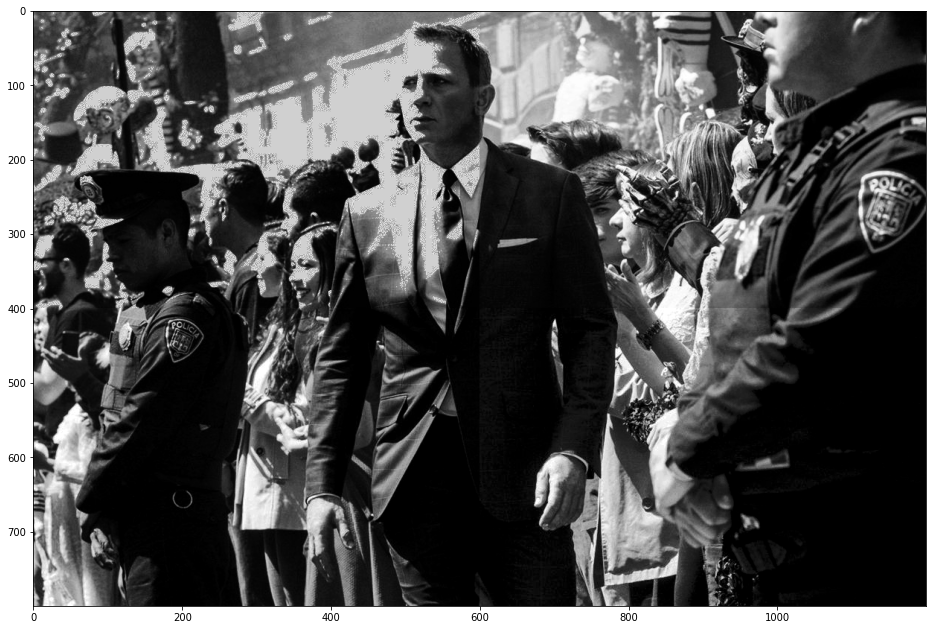

In [241]:
# final image
j = np.vstack([np.hstack([jd1, jd2]), np.hstack([jd3, jd4])])
plt.figure(figsize=(16, 16))
plt.imshow(j, cmap='gray', vmin=0, vmax=255)
plt.show()
# cv2.imwrite(folder + '/j.png', j)